In [1]:
library(data.table) #to read gz file
library(tidyverse)
library(CellChat)
library(patchwork)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  ma

In [2]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: x86_64-conda-linux-gnu
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /work/project/ladcol_011/conda_path/miniconda3/envs/cellchat/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=de_DE.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] patchwork_1.2.0     CellChat_2.1.2      Biobase_2.64.0     
 [4] BiocGenerics_0.50.0 igraph_2.0.3        lubridate_1.9.3    
 [7] forcats_1.0.0       stringr_1.5.1       dplyr_1.1.4        
[10] purrr

In [3]:
load("../build_customDB/CellChat_Custom/CellChatDB_custom.rda")

In [4]:
start <- Sys.time()

In [5]:
str(db.custom)

List of 4
 $ interaction:'data.frame':	6941 obs. of  9 variables:
  ..$ interaction_name  : chr [1:6941] "S100A10_TRPV6" "JAG2_NOTCH1" "DLL1_NOTCH1" "IGF1_IGF1R" ...
  ..$ pathway_name      : chr [1:6941] "" "" "" "" ...
  ..$ ligand            : chr [1:6941] "S100A10" "JAG2" "DLL1" "IGF1" ...
  ..$ receptor          : chr [1:6941] "TRPV6" "NOTCH1" "NOTCH1" "IGF1R" ...
  ..$ agonist           : chr [1:6941] "" "" "" "" ...
  ..$ antagonist        : chr [1:6941] "" "" "" "" ...
  ..$ co_A_receptor     : chr [1:6941] "" "" "" "" ...
  ..$ co_I_receptor     : chr [1:6941] "" "" "" "" ...
  ..$ interaction_name_2: chr [1:6941] "S100A10 - TRPV6" "JAG2 - NOTCH1" "DLL1 - NOTCH1" "IGF1 - IGF1R" ...
 $ complex    :'data.frame':	0 obs. of  0 variables
 $ cofactor   :'data.frame':	0 obs. of  0 variables
 $ geneInfo   : tibble [26,827 × 8] (S3: tbl_df/tbl/data.frame)
  ..$ EntryID.uniprot: chr [1:26827] "P04217" "Q9NQ94" "P01023" "A8K2U0" ...
  ..$ Symbol         : chr [1:26827] "A1BG" "A1CF" "A2M

In [6]:
CellChatDB.use <- db.custom

### Read in the expression data of interacting cells:
The dataset used here is publicly available single-cell data from Lasry, et al. 2022. The data was processed, filtered and normalized.

In [7]:
input_dir <- "../../../../../data_preprocessing/Lasry/2.filtering/outs/"
output_dir <- "outs/"

In [8]:
counts <- fread(paste0(input_dir,"counts_lognorm.csv.gz"), header = TRUE)
counts <- as.data.frame(counts)
rownames(counts) <- counts$gene_symbol
counts <- counts[,-1]
print(str(counts))

'data.frame':	15770 obs. of  46702 variables:
 $ X2020.09.15.AML0024.CATCAAGGTTAGCGGA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CATCAAGTCCGAGAAG           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CATCCACAGGGACCAT           : num  0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACAGAGCAAGA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACAGTTCCATG           : num  0 0.993 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACGTAGAATAC           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACGTTCTCCCA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACTCCGAACGC           : num  0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCAACTCTAGTCAG           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCACAAGACAGTCG           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCACACAATTGCCA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020.09.15.AML0024.CCTCACACAGAACTAA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X2020

In [9]:
anno_cells <- read.table(paste0(input_dir,"anno_cells_norm.txt")
                         ,sep = "\t"
                         # ,row.names = 1
                         ,header = TRUE
                         )
print(str(anno_cells))

'data.frame':	46702 obs. of  92 variables:
 $ sample_ID                    : chr  "AML-0024" "AML-0024" "AML-0024" "AML-0024" ...
 $ cell                         : chr  "2020-09-15-AML0024:CATCAAGGTTAGCGGA" "2020-09-15-AML0024:CATCAAGTCCGAGAAG" "2020-09-15-AML0024:CATCCACAGGGACCAT" "2020-09-15-AML0024:CCTCAACAGAGCAAGA" ...
 $ UMAP_1                       : num  -0.731 -2.2 -2.867 -1.666 -0.972 ...
 $ UMAP_2                       : num  -15.8 -16.7 -16.1 -16.1 -17.5 ...
 $ orig.ident                   : chr  "2020-09-15-AML0024" "2020-09-15-AML0024" "2020-09-15-AML0024" "2020-09-15-AML0024" ...
 $ samples                      : chr  "AML0024" "AML0024" "AML0024" "AML0024" ...
 $ Broad_cell_identity          : chr  "CD14+ monocyte" "CD14+ monocyte" "CD16+ monocyte" "CD14+ monocyte" ...
 $ Cell_type_identity           : chr  "CD14+ IFN+" "CD14+" "CD16+" "CD14+ IFN+" ...
 $ clusters_res.2               : int  7 7 7 7 80 7 7 7 7 7 ...
 $ CNV_pos                      : chr  "CNV+" "CNV+" "CN

In [10]:
rownames(anno_cells) <- anno_cells$cell_ID
colnames(counts) <- anno_cells$cell_ID

CellChat requires to be run on the each dataset (condition) separately and then merge different CellChat objects together.

Their documentation can be found in [here](https://htmlpreview.github.io/?https://github.com/jinworks/CellChat/blob/master/tutorial/Comparison_analysis_of_multiple_datasets.html)

In [11]:
cells.case <- rownames(anno_cells)[anno_cells$health_status == "AML"]
cells.control <- rownames(anno_cells)[anno_cells$health_status == "healthy"]

In [12]:
counts.case <- counts[, cells.case]
counts.case <- data.matrix(counts.case)
counts.control <- counts[, cells.control]
counts.control <- data.matrix(counts.control)

In [13]:
anno.case <- anno_cells[cells.case, ]
anno.control <- anno_cells[cells.control, ]

In [14]:
# create CellChat obj for each condition

cellchat.case <- createCellChat(object = counts.case, meta = anno.case, group.by = "cell_type")
cellchat.control <- createCellChat(object = counts.control, meta = anno.control, group.by = "cell_type")

[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = counts.case, meta = anno.case, group.by = "cell_type"):
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, DC, Ery, Gran, HSPC, Mono, NK, T 
[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = counts.control, meta = anno.control, :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B, DC, Ery, Gran, HSPC, Mono, NK, T 


In [15]:
dplyr::glimpse(CellChatDB.use$interaction)

Rows: 6,941
Columns: 9
$ interaction_name   <chr> "S100A10_TRPV6", "JAG2_NOTCH1", "DLL1_NOTCH1", "IGF…
$ pathway_name       <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ ligand             <chr> "S100A10", "JAG2", "DLL1", "IGF1", "JAG1", "WNT5A",…
$ receptor           <chr> "TRPV6", "NOTCH1", "NOTCH1", "IGF1R", "NOTCH1", "FZ…
$ agonist            <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ antagonist         <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ co_A_receptor      <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ co_I_receptor      <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ interaction_name_2 <chr> "S100A10 - TRPV6", "JAG2 - NOTCH1", "DLL1 - NOTCH1"…


In [16]:
cellchat.case@DB <- CellChatDB.use
cellchat.control@DB <- CellChatDB.use

In [17]:
options(future.globals.maxSize = 8000 * 1024^2)

To infer the cell state-specific communications, CellChat identifies over-expressed ligands or receptors in one cell group and then identifies over-expressed ligand-receptor interactions if either ligand or receptor are over-expressed.

In [18]:
# subset the expression data of signaling genes for saving computation cost
cellchat.case <- subsetData(cellchat.case) # This step is necessary even if using the whole database
future::plan("multisession", workers = 4) # do parallel
cellchat.case <- identifyOverExpressedGenes(cellchat.case)
cellchat.case <- identifyOverExpressedInteractions(cellchat.case)

Issue identified!! Please check the official Gene Symbol of the following genes:  
 DEFB4B CGB8 CCL4L1 DEFB106B GPR15L LOC101059948 C1orf194 HHLA3 FAM126B GGT2 
The number of highly variable ligand-receptor pairs used for signaling inference is 2335 


In [19]:
# subset the expression data of signaling genes for saving computation cost
cellchat.control <- subsetData(cellchat.control) # This step is necessary even if using the whole database
future::plan("multisession", workers = 4) # do parallel
cellchat.control <- identifyOverExpressedGenes(cellchat.control)
cellchat.control <- identifyOverExpressedInteractions(cellchat.control)

Issue identified!! Please check the official Gene Symbol of the following genes:  
 DEFB4B CGB8 CCL4L1 DEFB106B GPR15L LOC101059948 C1orf194 HHLA3 FAM126B GGT2 
The number of highly variable ligand-receptor pairs used for signaling inference is 2356 


### Part II: Inference of cell-cell communication network
CellChat infers the biologically significant cell-cell communication by assigning each interaction with a probability value and peforming a permutation test. CellChat models the probability of cell-cell communication by integrating gene expression with prior known knowledge of the interactions between signaling ligands, receptors and their cofactors using the law of mass action.

### Compute the communication probability and infer cellular communication network

**CAUTION**

CAUTION: The number of inferred ligand-receptor pairs clearly depends on the method for calculating the average gene expression per cell group. By default, CellChat uses a statistically robust mean method called ‘trimean’, which produces fewer interactions than other methods.

Of note, ‘trimean’ approximates 25% truncated mean, implying that the average gene expression is zero if the percent of expressed cells in one group is less than 25%.

To use 10% truncated mean, USER can set type = "truncatedMean" and trim = 0.1

In [20]:
cellchat.case <- computeCommunProb(cellchat.case, type =  "truncatedMean", trim = 0.1)
cellchat.control <- computeCommunProb(cellchat.control, type =  "truncatedMean", trim = 0.1)

truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-08-26 16:45:24.657784]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-08-26 16:47:55.217524]"
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-08-26 16:48:01.545838]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-08-26 16:50:33.252577]"


**Cell filter**

Users can filter out the cell-cell communication if there are only few cells in certain cell groups. By default, the minimum number of cells required in each cell group for cell-cell communication is 10.

In [21]:
# cellchat.case <- filterCommunication(cellchat.case, min.cells = 10)
# cellchat.control <- filterCommunication(cellchat.control, min.cells = 10)

### Calculate the aggregated cell-cell communication network
CellChat calculates the aggregated cell-cell communication network by counting the number of links or summarizing the communication probability. Users can also calculate the aggregated network among a subset of cell groups by setting sources.use and targets.use.

In [22]:
cellchat.case <- aggregateNet(cellchat.case)
cellchat.control <- aggregateNet(cellchat.control)

In [23]:
groupSize <- as.numeric(table(cellchat.case@idents))

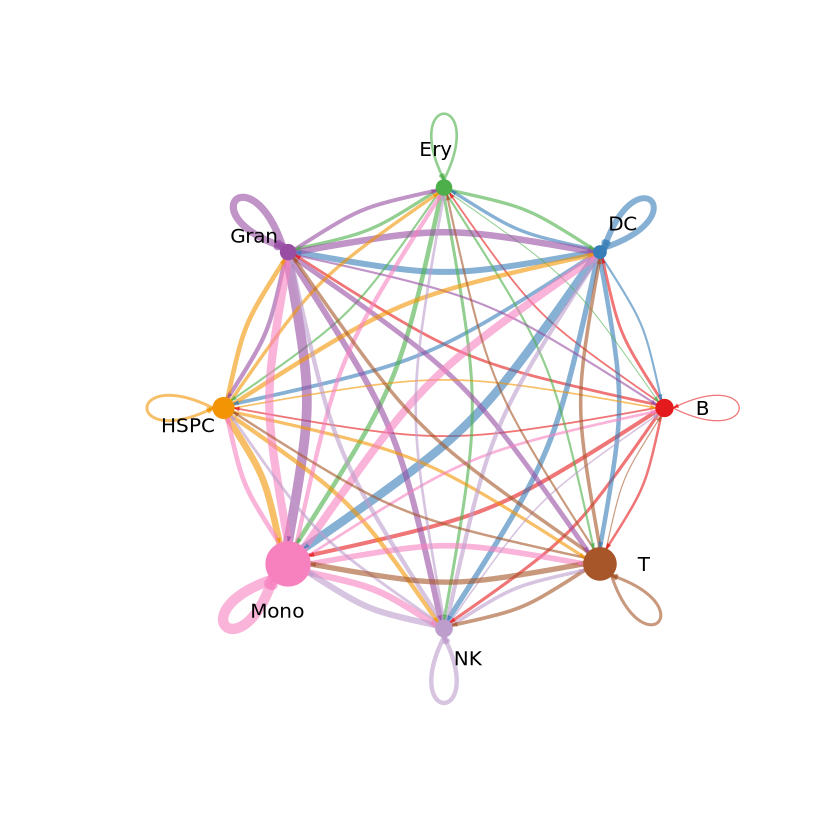

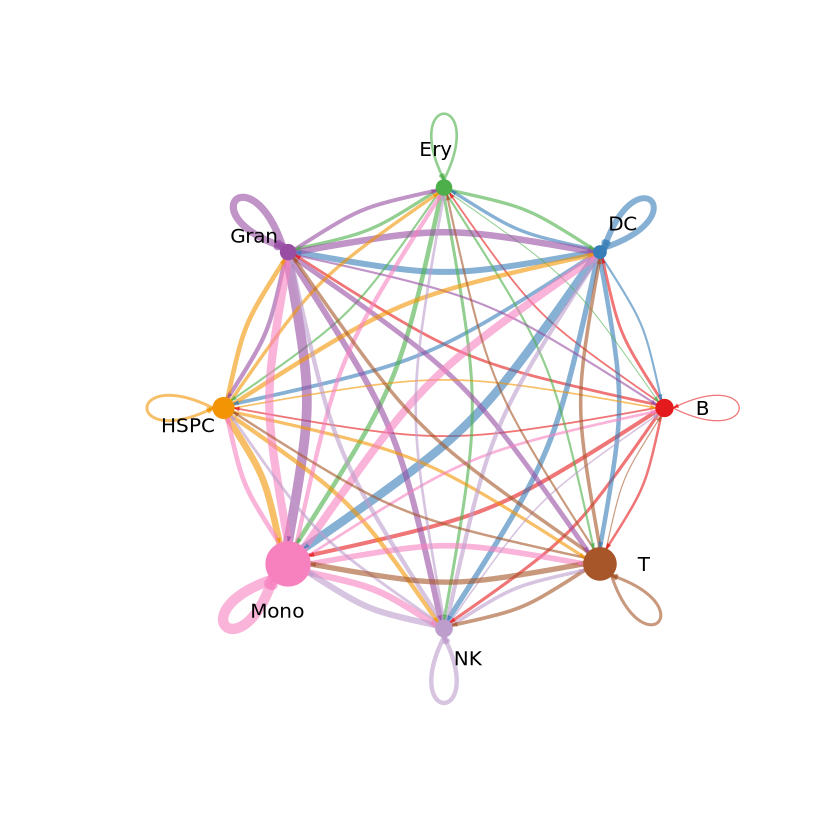

In [24]:
netVisual_circle(cellchat.case@net$count, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")

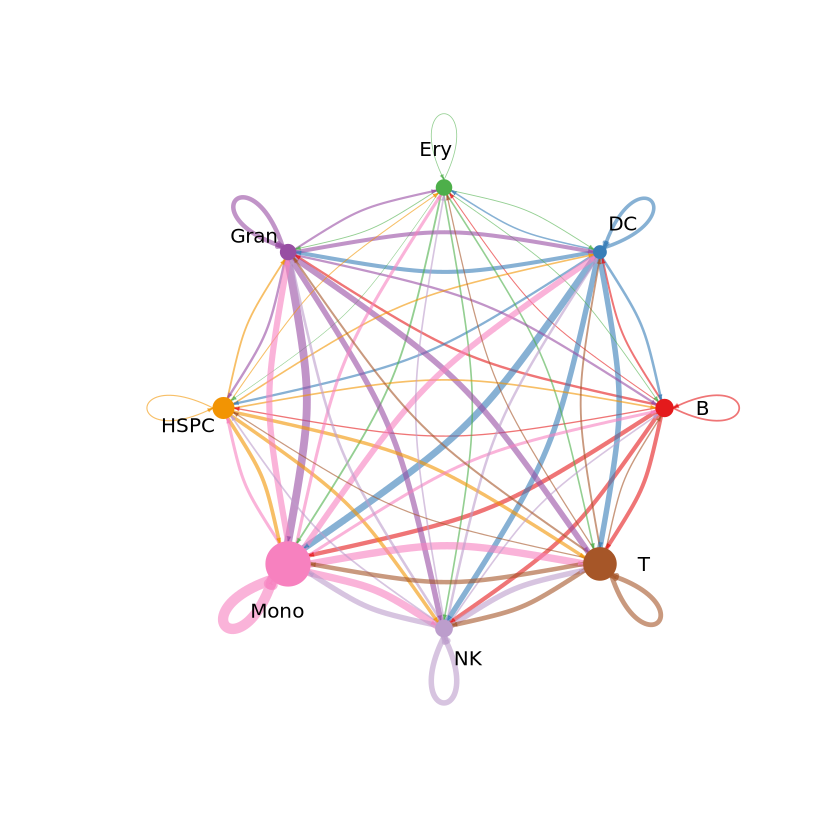

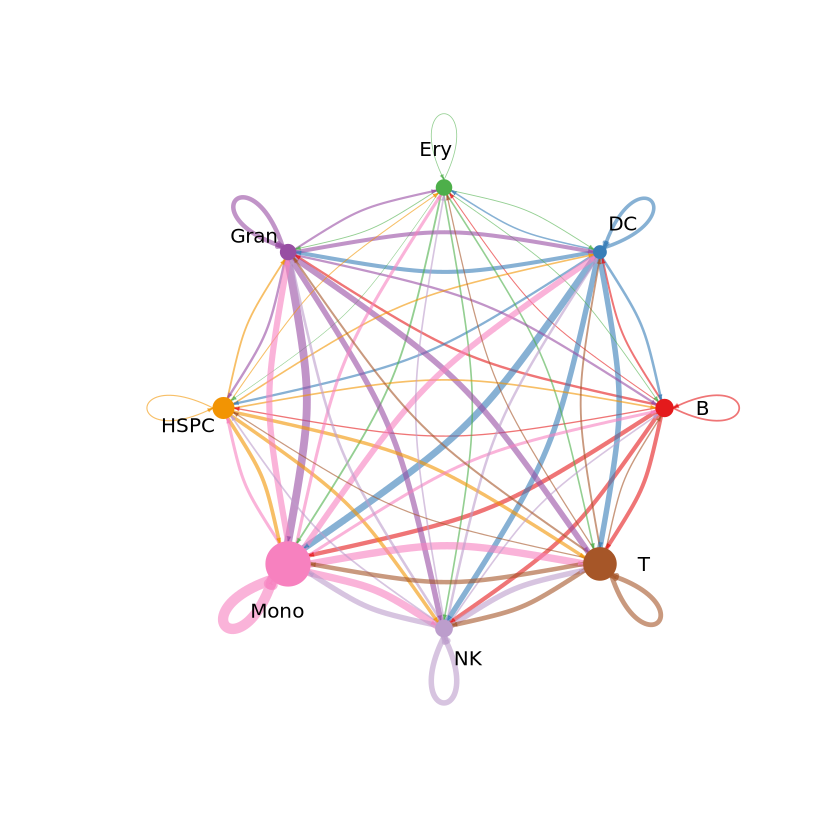

In [25]:
netVisual_circle(cellchat.case@net$weight, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")

In [26]:
groupSize <- as.numeric(table(cellchat.control@idents))

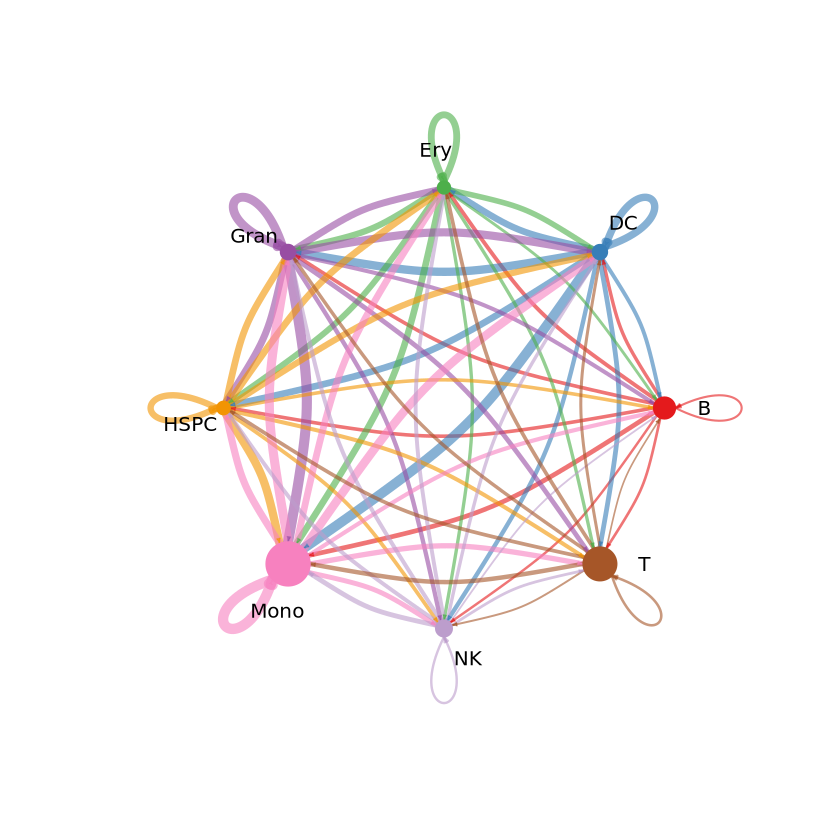

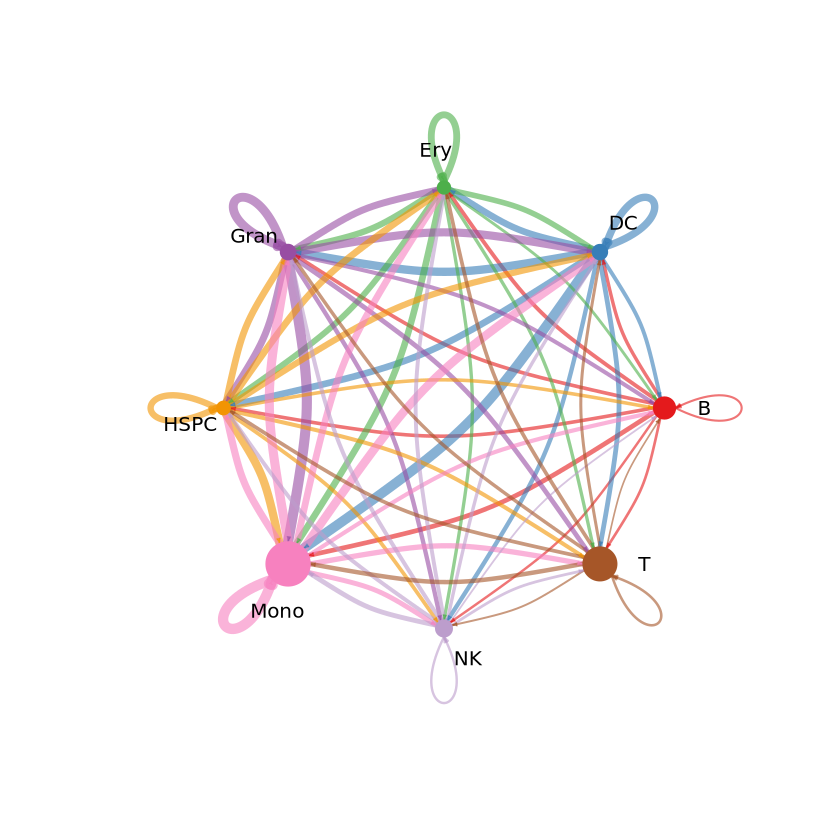

In [27]:
netVisual_circle(cellchat.control@net$count, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")

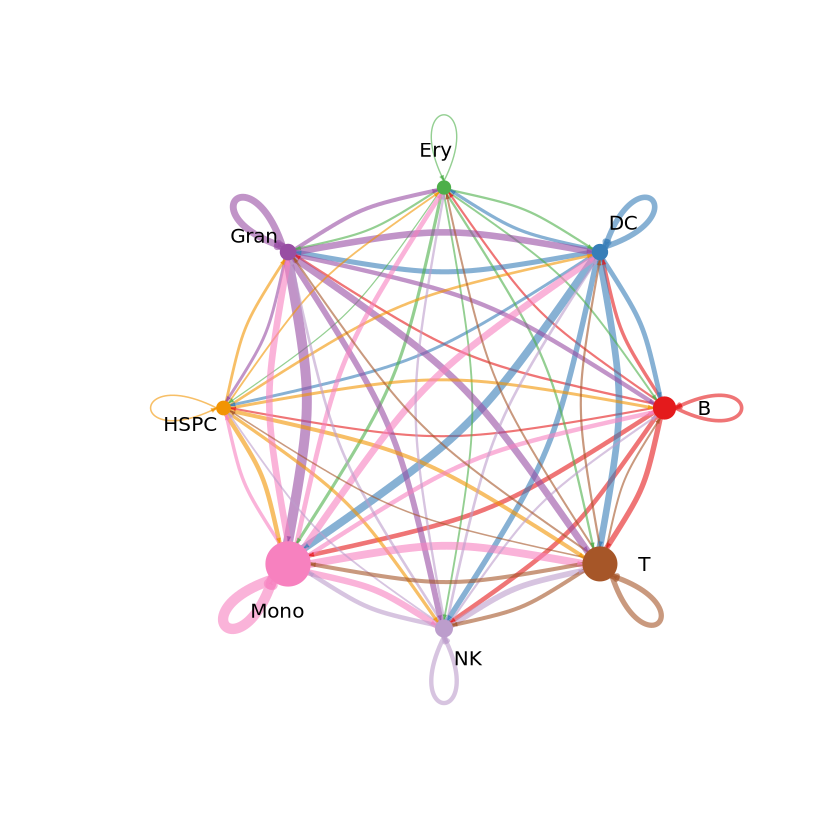

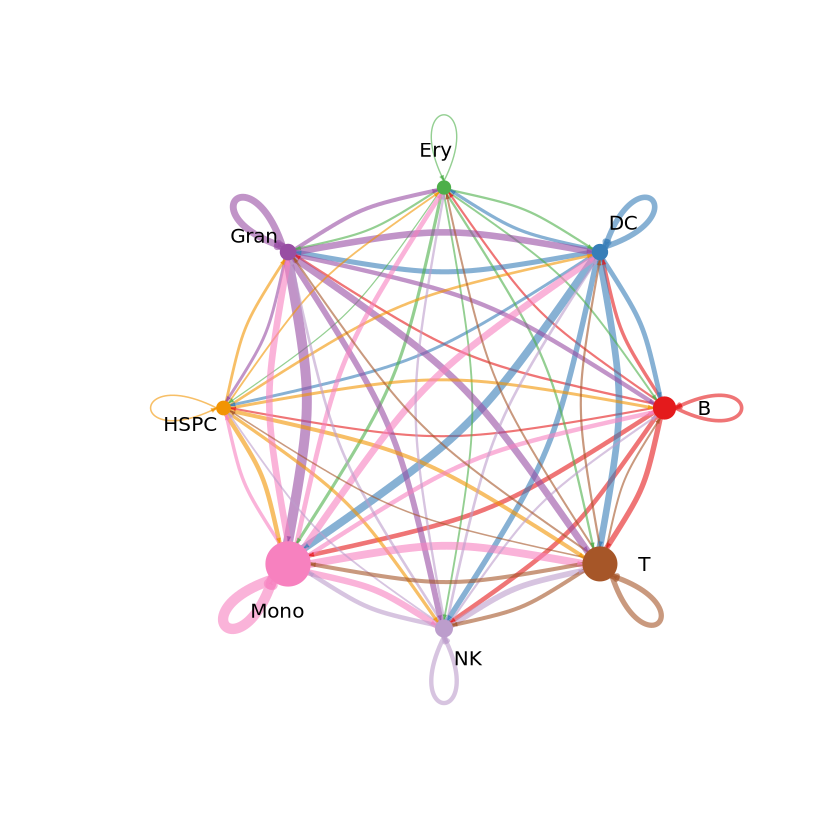

In [28]:
netVisual_circle(cellchat.control@net$weight, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")

In [29]:
object.list <- list(AML = cellchat.case, healthy = cellchat.control)
cellchat.merged <- mergeCellChat(object.list, add.names = names(object.list))
#> Merge the following slots: 'data.signaling','images','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.
cellchat.merged

Merge the following slots: 'data.signaling','images','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



An object of class CellChat created from a merged object with multiple datasets 
 1252 signaling genes.
 46702 cells. 
CellChat analysis of single cell RNA-seq data! 

In [30]:
# Export the merged CellChat object and the list of the two separate objects for later use
save(object.list, file = "outs/cellchat_object.list.RData")
save(cellchat.merged, file = "outs/ccellchat_merged.RData")

In [31]:
load("outs/ccellchat_merged.RData")
load("outs/cellchat_object.list.RData")

### Compare the total number of interactions and interaction strength
To answer the question on whether the cell-cell communication is enhanced or not, CellChat compares the total number of interactions and interaction strength of the inferred cell-cell communication networks from different biological conditions.

In [32]:
gg1 <- compareInteractions(cellchat.merged, show.legend = F, group = c(1,2))
gg2 <- compareInteractions(cellchat.merged, show.legend = F, group = c(1,2), measure = "weight")

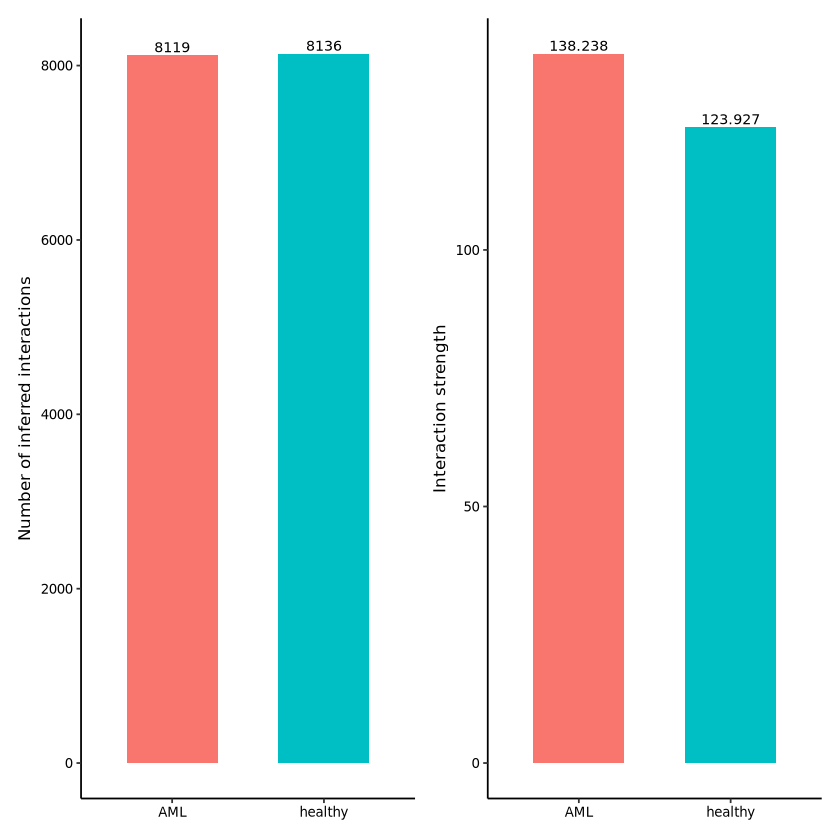

In [33]:
gg1 + gg2

### Compare the number of interactions and interaction strength among different cell populations
To identify the interaction between which cell populations showing significant changes, CellChat compares the number of interactions and interaction strength among different cell populations using a circle plot with differential interactions (option A), a heatmap with differential interactions (option B) and two circle plots with the number of interactions or interaction strength per dataset (option C). Alternatively, users can examine the differential number of interactions or interaction strength among coarse cell types by aggregating the cell-cell communication based on the defined cell groups (option D).

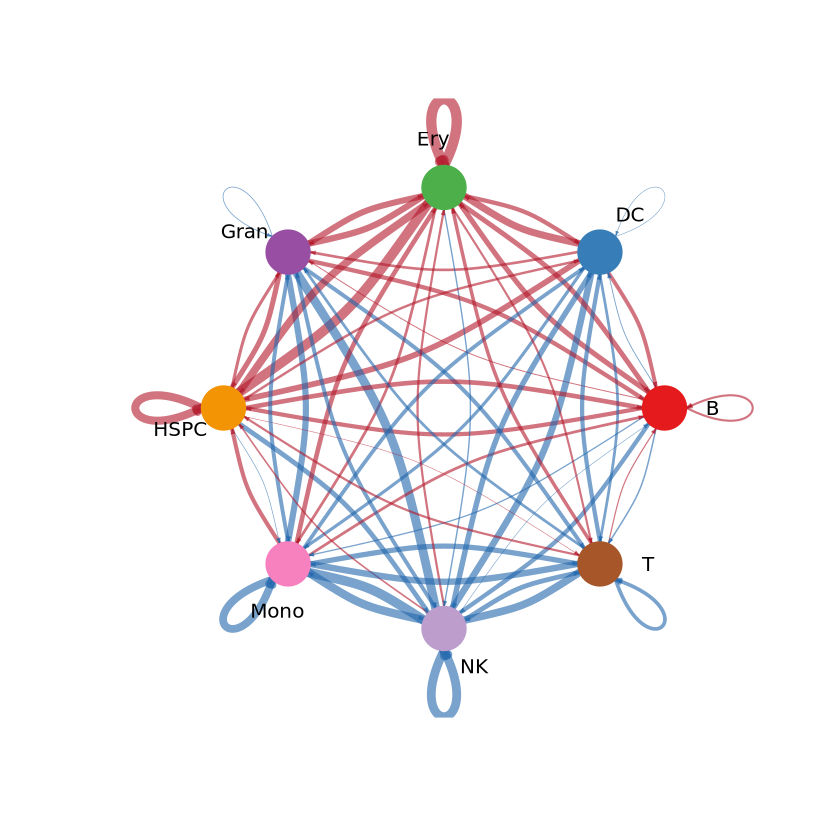

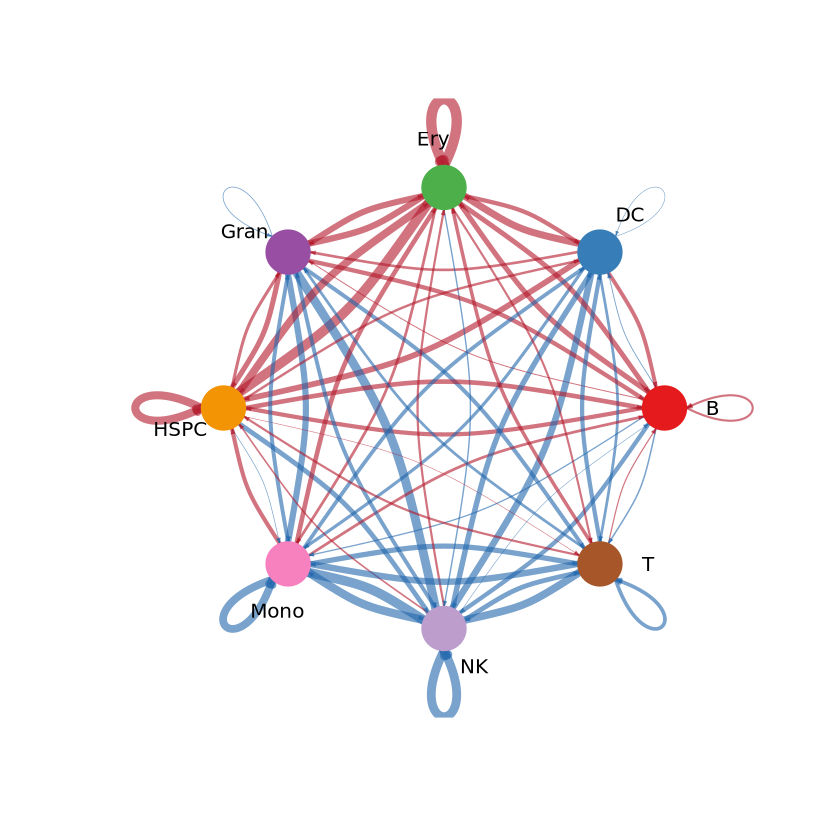

In [34]:
# (A) Circle plot showing differential number of interactions and 
# interaction strength among different cell populations across two datasets
netVisual_diffInteraction(cellchat.merged, weight.scale = T)

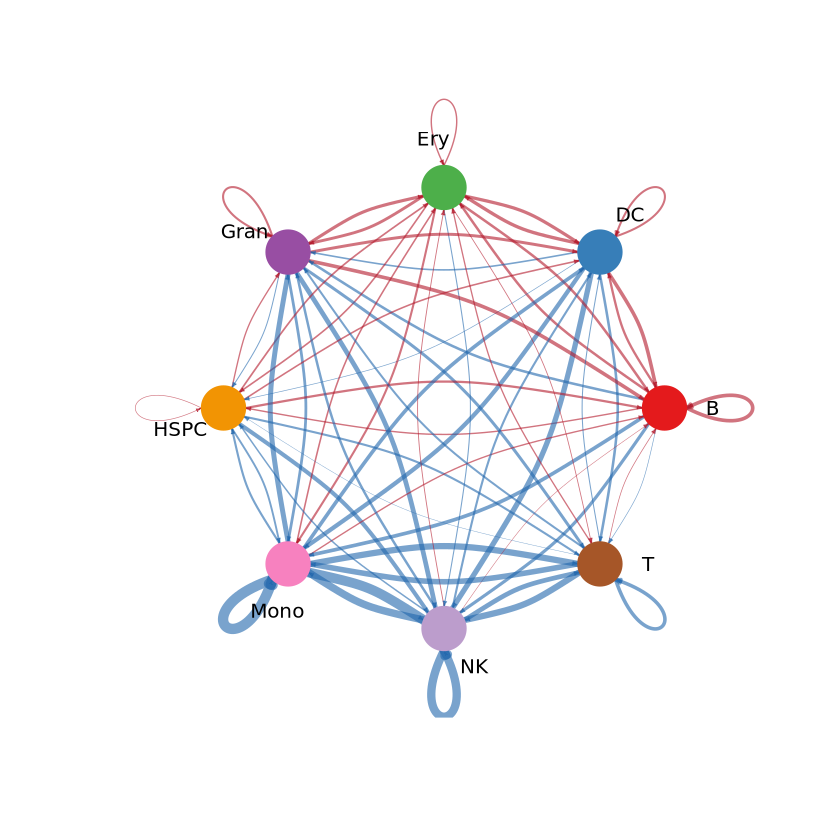

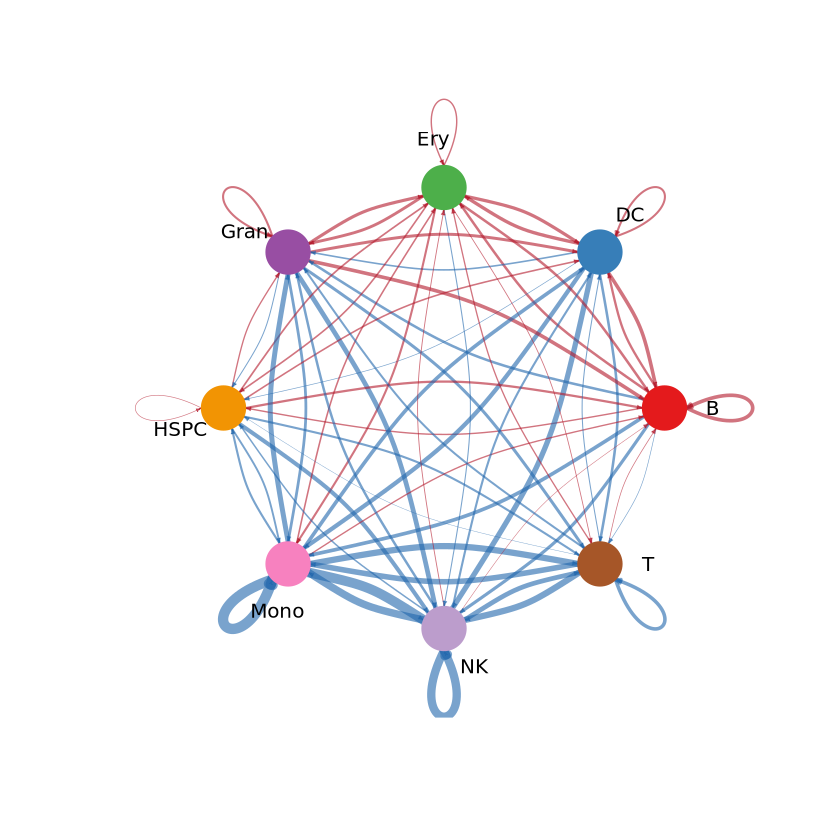

In [35]:
netVisual_diffInteraction(cellchat.merged, weight.scale = T, measure = "weight")

In [36]:
# Heatmap
gg1 <- netVisual_heatmap(cellchat.merged)

Do heatmap based on a merged object 




In [37]:
gg2 <- netVisual_heatmap(cellchat.merged, measure = "weight")

Do heatmap based on a merged object 




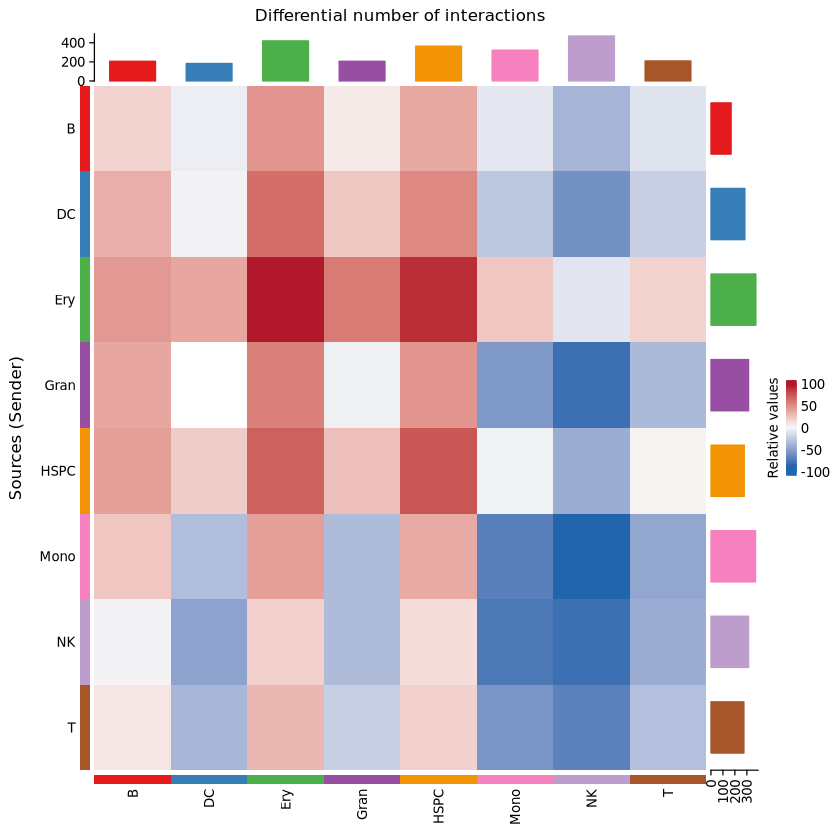

In [38]:
gg1

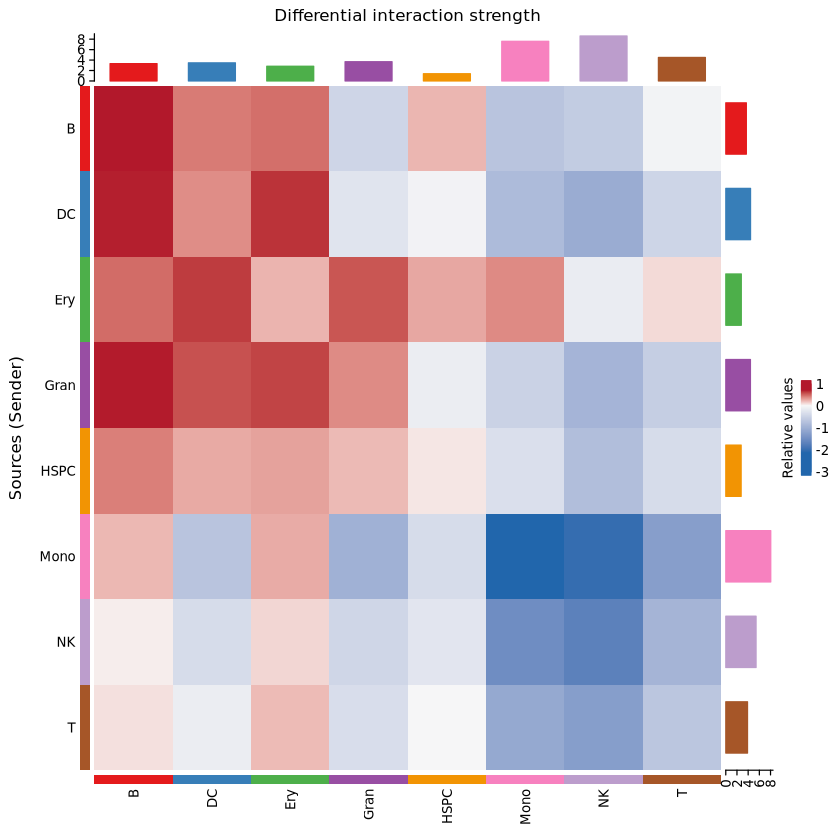

In [39]:
gg2

### Differential Interaction

In [40]:
# define a positive dataset, i.e., the dataset with positive fold change against the other dataset
pos.dataset = "AML"
# define a char name used for storing the results of differential expression analysis
features.name = paste0(pos.dataset, ".merged")

In [41]:
# perform differential expression analysis 
# Of note, compared to CellChat version < v2, CellChat v2 now performs an ultra-fast Wilcoxon test using the presto package, 
# which gives smaller values of logFC. Thus we here set a smaller value of thresh.fc compared to the original one (thresh.fc = 0.1).
# Users can also provide a vector and dataframe of customized DEGs by modifying the cellchat@var.features$LS.merged and cellchat@var.features$LS.merged.info. 

cellchat.merged <- identifyOverExpressedGenes(cellchat.merged, group.dataset = "datasets", pos.dataset = pos.dataset, 
                                       features.name = features.name, only.pos = FALSE, thresh.pc = 0.1, 
                                       group.DE.combined = TRUE, do.fast = TRUE) 

Use the joint cell labels from the merged CellChat object



In [42]:
# map the results of differential expression analysis onto the inferred cell-cell communications to easily manage/subset the ligand-receptor pairs of interest
net <- netMappingDEG(cellchat.merged, features.name = features.name, variable.all = TRUE)

In [43]:
net_significant <- net %>%
  filter(ligand.pvalues < 0.1 | receptor.pvalues < 0.1)

In [46]:
nrow(net)

[1] 16255

In [47]:
nrow(net_significant)

[1] 15730

In [55]:
subsetCommunication(cellchat.merged, net = net, datasets = "AML",ligand.logFC = 0.25, receptor.logFC = 0.25)

source target ligand receptor prob      pval interaction_name
1  Gran   DC     SRGN   CD44     0.1846065 0.00 SRGN_CD44       
2  Mono   DC     SRGN   CD44     0.1858435 0.00 SRGN_CD44       
3  NK     DC     SRGN   CD44     0.1332297 0.01 SRGN_CD44       
4  Gran   Gran   SRGN   CD44     0.1728533 0.00 SRGN_CD44       
5  Mono   Gran   SRGN   CD44     0.1740283 0.00 SRGN_CD44       
6  Gran   HSPC   SRGN   CD44     0.1662169 0.00 SRGN_CD44       
7  Mono   HSPC   SRGN   CD44     0.1673560 0.00 SRGN_CD44       
8  Gran   Mono   SRGN   CD44     0.1966242 0.00 SRGN_CD44       
9  Mono   Mono   SRGN   CD44     0.1979221 0.00 SRGN_CD44       
10 NK     Mono   SRGN   CD44     0.1424872 0.00 SRGN_CD44       
11 T      Mono   SRGN   CD44     0.1349261 0.00 SRGN_CD44       
12 Gran   T      SRGN   CD44     0.1581754 0.00 SRGN_CD44       
13 Mono   T      SRGN   CD44     0.1592699 0.00 SRGN_CD44       
   interaction_name_2 pathway_name datasets ligand.logFC ligand.pct.1
1  SRGN - CD44                     AML      0.5410864    86.69232    
2  SRGN - CD44                     AML      0.5410864    86.69232    
3  SRGN - CD44                     AML      0.5410864    86.69232    
4  SRGN - CD44                     AML      0.5410864    86.69232    
5  SRGN - CD44                     AML      0.5410864    86.69232    
6  SRGN - CD44                     AML      0.5410864    86.69232    
7  SRGN - CD44                     AML      0.5410864    86.69232    
8  SRGN - CD44                     AML      0.5410864    86.69232    
9  SRGN - CD44                     AML      0.5410864    86.69232    
10 SRGN - CD44                     AML      0.5410864    86.69232    
11 SRGN - CD44                     AML      0.5410864    86.69232    
12 SRGN - CD44                     AML      0.5410864    86.69232    
13 SRGN - CD44                     AML      0.5410864    86.69232    
   ligand.pct.2 ligand.pvalues receptor.logFC receptor.pct.1 receptor.pct.2
1  76.22386     0              0.2881915      76.86171       59.42263      
2  76.22386     0              0.2881915      76.86171       59.42263      
3  76.22386     0              0.2881915      76.86171       59.42263      
4  76.22386     0              0.2881915      76.86171       59.42263      
5  76.22386     0              0.2881915      76.86171       59.42263      
6  76.22386     0              0.2881915      76.86171       59.42263      
7  76.22386     0              0.2881915      76.86171       59.42263      
8  76.22386     0              0.2881915      76.86171       59.42263      
9  76.22386     0              0.2881915      76.86171       59.42263      
10 76.22386     0              0.2881915      76.86171       59.42263      
11 76.22386     0              0.2881915      76.86171       59.42263      
12 76.22386     0              0.2881915      76.86171       59.42263      
13 76.22386     0              0.2881915      76.86171       59.42263      
   receptor.pvalues
1  8.880933e-200   
2  8.880933e-200   
3  8.880933e-200   
4  8.880933e-200   
5  8.880933e-200   
6  8.880933e-200   
7  8.880933e-200   
8  8.880933e-200   
9  8.880933e-200   
10 8.880933e-200   
11 8.880933e-200   
12 8.880933e-200   
13 8.880933e-200

In [59]:
subsetCommunication(cellchat.merged, net = net, datasets = "healthy",ligand.logFC = -0.1, receptor.logFC = -0.1)

source target ligand  receptor prob        pval interaction_name
1   B      NK     CD48    CD2      0.014379889 0    CD48_CD2        
2   DC     NK     CD48    CD2      0.017020425 0    CD48_CD2        
3   Gran   NK     CD48    CD2      0.010121067 0    CD48_CD2        
4   Mono   NK     CD48    CD2      0.019611116 0    CD48_CD2        
5   NK     NK     CD48    CD2      0.008352683 0    CD48_CD2        
6   T      NK     CD48    CD2      0.021222655 0    CD48_CD2        
7   B      T      CD48    CD2      0.031293505 0    CD48_CD2        
8   DC     T      CD48    CD2      0.036923489 0    CD48_CD2        
9   Gran   T      CD48    CD2      0.022137971 0    CD48_CD2        
10  Mono   T      CD48    CD2      0.042412925 0    CD48_CD2        
11  NK     T      CD48    CD2      0.018308790 0    CD48_CD2        
12  T      T      CD48    CD2      0.045810644 0    CD48_CD2        
13  B      NK     B2M     KLRD1    0.239805166 0    B2M_KLRD1       
14  DC     NK     B2M     KLRD1    0.240550863 0    B2M_KLRD1       
15  Ery    NK     B2M     KLRD1    0.146186453 0    B2M_KLRD1       
16  Gran   NK     B2M     KLRD1    0.214198805 0    B2M_KLRD1       
17  HSPC   NK     B2M     KLRD1    0.199174242 0    B2M_KLRD1       
18  Mono   NK     B2M     KLRD1    0.248013474 0    B2M_KLRD1       
19  NK     NK     B2M     KLRD1    0.277197820 0    B2M_KLRD1       
20  T      NK     B2M     KLRD1    0.273466638 0    B2M_KLRD1       
21  B      T      B2M     KLRD1    0.067602732 0    B2M_KLRD1       
22  DC     T      B2M     KLRD1    0.067860750 0    B2M_KLRD1       
23  Ery    T      B2M     KLRD1    0.037862632 0    B2M_KLRD1       
24  Gran   T      B2M     KLRD1    0.058958033 0    B2M_KLRD1       
25  HSPC   T      B2M     KLRD1    0.054073228 0    B2M_KLRD1       
26  Mono   T      B2M     KLRD1    0.070463061 0    B2M_KLRD1       
27  NK     T      B2M     KLRD1    0.081005225 0    B2M_KLRD1       
28  T      T      B2M     KLRD1    0.079623953 0    B2M_KLRD1       
29  B      B      HLA-DRA CD37     0.280364014 0    HLA-DRA_CD37    
30  DC     B      HLA-DRA CD37     0.308575902 0    HLA-DRA_CD37    
⋮   ⋮      ⋮      ⋮       ⋮        ⋮           ⋮    ⋮               
85  NK     T      HLA-E   KLRD1    0.04588127  0.00 HLA-E_KLRD1     
86  T      T      HLA-E   KLRD1    0.04211439  0.00 HLA-E_KLRD1     
87  DC     B      CALM1   SELL     0.03219067  0.02 CALM1_SELL      
88  Gran   B      CALM1   SELL     0.03694860  0.00 CALM1_SELL      
89  NK     B      CALM1   SELL     0.04966842  0.00 CALM1_SELL      
90  T      B      CALM1   SELL     0.04509410  0.00 CALM1_SELL      
91  B      DC     CALM1   SELL     0.03525816  0.00 CALM1_SELL      
92  DC     DC     CALM1   SELL     0.04893493  0.00 CALM1_SELL      
93  Ery    DC     CALM1   SELL     0.04152947  0.00 CALM1_SELL      
94  Gran   DC     CALM1   SELL     0.05602447  0.00 CALM1_SELL      
95  Mono   DC     CALM1   SELL     0.04210446  0.00 CALM1_SELL      
96  NK     DC     CALM1   SELL     0.07480123  0.00 CALM1_SELL      
97  T      DC     CALM1   SELL     0.06807807  0.00 CALM1_SELL      
98  B      Gran   CALM1   SELL     0.03352370  0.01 CALM1_SELL      
99  DC     Gran   CALM1   SELL     0.04656015  0.00 CALM1_SELL      
100 Ery    Gran   CALM1   SELL     0.03949914  0.00 CALM1_SELL      
101 Gran   Gran   CALM1   SELL     0.05332493  0.00 CALM1_SELL      
102 Mono   Gran   CALM1   SELL     0.04004719  0.00 CALM1_SELL      
103 NK     Gran   CALM1   SELL     0.07126523  0.00 CALM1_SELL      
104 T      Gran   CALM1   SELL     0.06483761  0.00 CALM1_SELL      
105 DC     HSPC   CALM1   SELL     0.03377599  0.04 CALM1_SELL      
106 Gran   HSPC   CALM1   SELL     0.03875885  0.00 CALM1_SELL      
107 NK     HSPC   CALM1   SELL     0.05206817  0.00 CALM1_SELL      
108 T      HSPC   CALM1   SELL     0.04728384  0.00 CALM1_SELL      
109 DC     Mono   CALM1   SELL     0.03971188  0.00 CALM1_SELL      
110 Ery    Mono   CALM1   SELL     0.03365279  0.00 CALM1_SELL      
11

In [17]:
net_significant$interaction_ID <- paste0(net_significant$source, ":", net_significant$ligand, "_", net_significant$target, ":", net_significant$receptor)

In [18]:
net_significant$direction_lig <- NA
net_significant$direction_rec <- NA

net_significant$direction_lig[!is.na(net_significant$ligand.logFC) & (net_significant$ligand.logFC < 0)] <- "down"
net_significant$direction_lig[!is.na(net_significant$ligand.logFC) & (net_significant$ligand.logFC > 0)] <- "up"

net_significant$direction_rec[!is.na(net_significant$receptor.logFC) & (net_significant$receptor.logFC < 0)] <- "down"
net_significant$direction_rec[!is.na(net_significant$receptor.logFC) & (net_significant$receptor.logFC > 0)] <- "up"

net_significant$direction_lig_rec <- paste(net_significant$direction_lig
                                            ,net_significant$direction_rec
                                            ,sep = "_")

idx_down <- (net_significant$direction_lig_rec == "down_NA") | (
    net_significant$direction_lig_rec == "NA_down") | (
    net_significant$direction_lig_rec == "down_down")
idx_up <- (net_significant$direction_lig_rec == "up_NA") | (
    net_significant$direction_lig_rec == "NA_up") | (
    net_significant$direction_lig_rec == "up_up")

net_significant$direction <- NA
net_significant$direction[idx_down] <- "down"
net_significant$direction[idx_up] <- "up"
net_significant$direction[!(idx_down | idx_up)] <- "ambigous"

In [19]:
nrow(net_significant[net_significant$direction=="up",])

[1] 7669

In [20]:
nrow(net_significant[net_significant$direction=="down",])

[1] 3324

In [21]:
nrow(net_significant[net_significant$direction=="ambigous",])

[1] 1881

In [22]:
write.csv(net_significant,"outs/CellChat_significant.csv")

In [23]:
save(net_significant, file = "outs/cellchat_interactions.RData")

In [24]:
print( Sys.time() - start )

ERROR: Error in `-.POSIXt`(Sys.time(), start): can only subtract numbers from "POSIXt" objects
